In [1]:
import genome
from genome import Genom
import numpy as np
import operator
import copy

In [2]:
genom = Genom(2,1)

In [3]:
genom.p_nodes()
genom.p_connections()

===== Input Nodes =====
Key: -2 Type: input Bias: 0
Key: -1 Type: input Bias: 0
===== Hidden Nodes =====
===== Output Nodes =====
Key: 0 Type: out Bias: 0

===== Connections =====
-2 --> 0 Weight: 1.6796507266790015 is active : True
-1 --> 0 Weight: -0.7355267707308804 is active : True



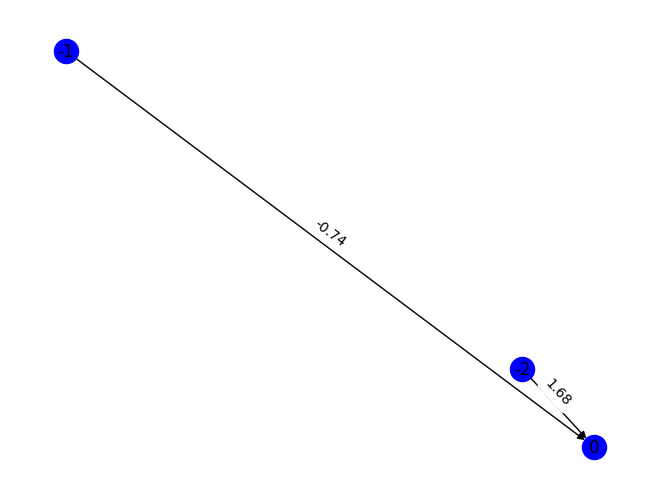

In [4]:
genom.visualize()

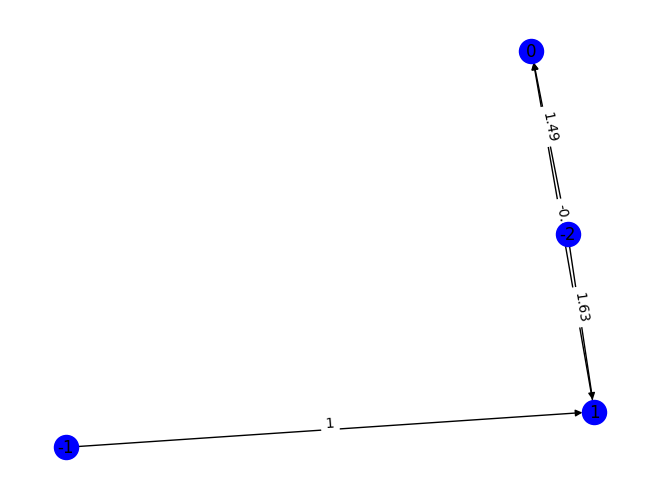

In [5]:
for _ in range(10):
    genom.mutate()
genom.visualize(labels=True)

In [6]:
genom.p_nodes()
genom.p_connections()

===== Input Nodes =====
Key: -2 Type: input Bias: 0
Key: -1 Type: input Bias: 0
===== Hidden Nodes =====
Key: 1 Type: hidden Bias: 0
===== Output Nodes =====
Key: 0 Type: out Bias: 0

===== Connections =====
-2 --> 0 Weight: 1.485383580302584 is active : True
-1 --> 0 Weight: -0.797329128927762 is active : False
-1 --> 1 Weight: 1 is active : True
1 --> 0 Weight: -0.797329128927762 is active : True
-2 --> 1 Weight: 1.6344851634106135 is active : True



In [7]:
genom.forward([1,1])

[(0, -0.6151681802127129)]

In [8]:
def same_connection(con1,con2):
        return con1.in_Node.key == con2.in_Node.key and con1.out_Node.key == con2.out_Node.key

def contains_connection(con,l_cons):
    for c in l_cons:
        if same_connection(c,con):
            return True
        
    return False

In [35]:
def crossover(genom1,genom2):

        con1 = genom1.connections
        con2 = genom2.connections

        fit1 = np.random.rand(1)
        fit2 = np.random.rand(1)

        in_Nodes, out_Nodes, hidden_Nodes = None,None,None

        new_con = []
        for c1 in con1:
            for c2 in con2:
                if same_connection(c1,c2):
                    if c1.is_active == c2.is_active:
                        if np.random.rand(1) < 0.5:
                            new_con.append(c1)
                        else:
                            new_con.append(c2)
                        break
                    elif fit1 >= fit2:
                        new_con.append(c1)
                    else:
                        new_con.append(c2)

        if fit1 >= fit2:
            for c1 in con1:
                if not contains_connection(c1, new_con):
                    new_con.append(c1)
        else:
            for c2 in con2:
                if not contains_connection(c2, new_con):
                    new_con.append(c2)

        g = Genom(2,1)
        #g.create(genom1.in_Nodes,genom1.out_Nodes,genom1.hidden_Nodes,new_con)
        g.in_Nodes = genom1.in_Nodes
        g.in_Nodes = genom1.out_Nodes
        g.in_Nodes = genom1.hidden_Nodes if fit1 > fit2 else genom2.hidden_Nodes
        g.connections = new_con
        g.visualize()

In [27]:
genom1 = Genom(2,1)
genom2 = Genom(2,1)

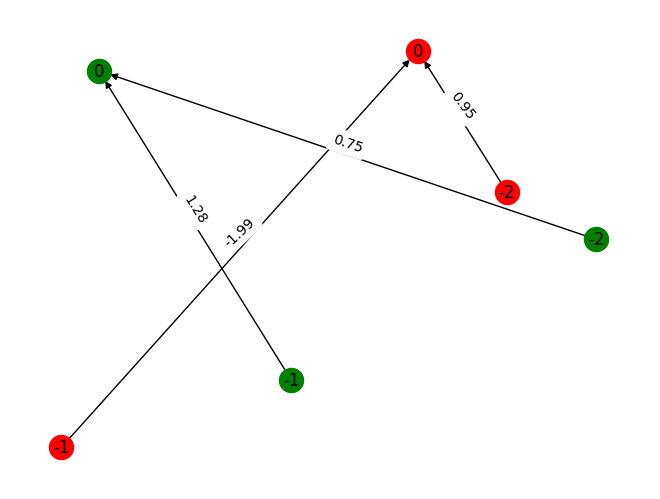

In [28]:
genom1.visualize(color="red")
genom2.visualize(color="green")

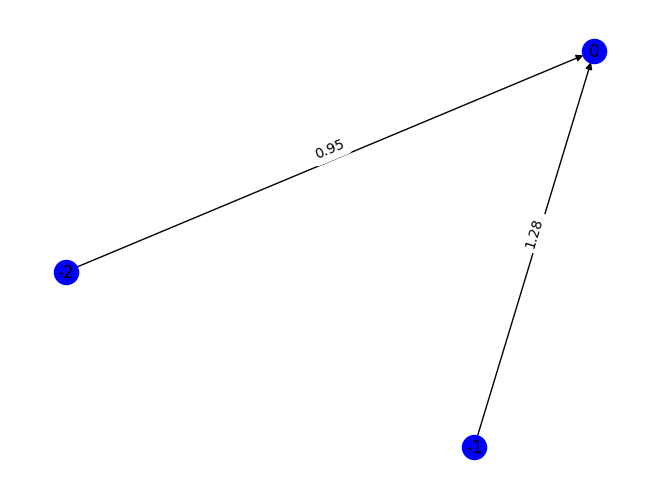

In [30]:
crossover(genom1,genom2)

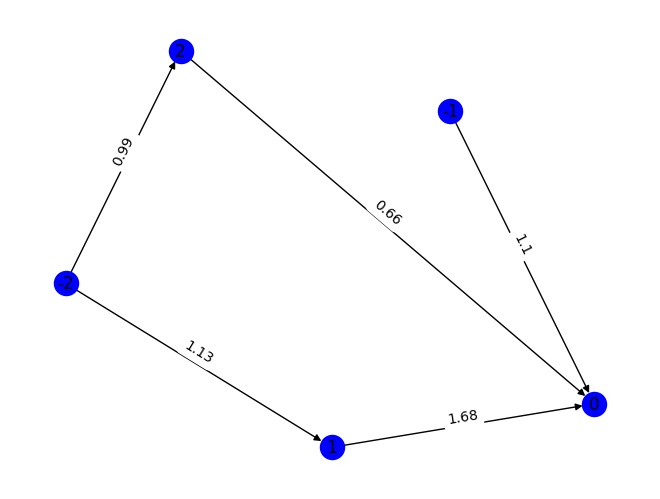

In [31]:
for _ in range(10):
    genom2.mutate()

genom2.visualize()

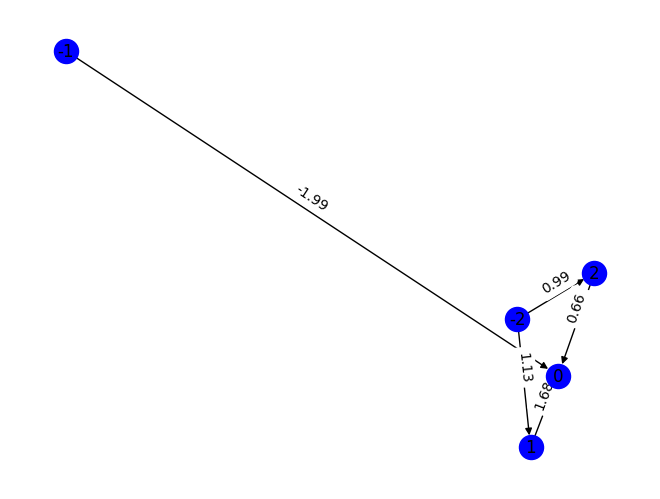

In [39]:
crossover(genom1,genom2)

In [ ]:
class NN():

    def __init__(self, popSize = 10, n_In = 2, n_Out = 1) -> None:
        self.population = [(Genom(n_In,n_Out),0) for _ in range(popSize)] 
        self.popSize = popSize

    def forwardpass(self, index,x):
        return self.population[index][0].forward(x)

    def mutate(self,pop):
        for p in pop:
            p[0].mutate()

    def same_connection(self,con1,con2):
        return con1.in_Node.key == con2.in_Node.key and con1.out_Node.key == con2.out_Node.key

    def contains_connection(self,con,l_cons):
        for c in l_cons:
            if self.same_connection(c,con):
                return True
            
        return False
    
    def crossover(self):
        idx = [i for i in range(len(self.population))]
        np.random.shuffle(idx)

        child_pop = []

        for i in range(0,len(idx),2):
            parent1 = self.population[i][0]
            parent2 = self.population[i+1][0]

            con1 = parent1.connections
            con2 = parent2.connections

            in_Nodes, out_Nodes, hidden_Nodes = None,None,None

            new_con = []
            for c1 in con1:
                for c2 in con2:
                    if self.same_connection(c1,c2):
                        if c1.is_active == c2.is_active:
                            if np.random.rand(1) < 0.5:
                                new_con.append(c1)
                            else:
                                new_con.append(c2)
                            break
                        elif self.population[i][1] >= self.population[i+1][1]:
                            new_con.append(c1)
                        else:
                            new_con.append(c2)

            if self.population[i][1] >= self.population[i+1][1]:
                in_Nodes = copy.deepcopy(parent1.in_Nodes)
                out_Nodes = copy.deepcopy(parent1.out_Nodes)
                hidden_Nodes = copy.deepcopy(parent1.hidden_Nodes)
                for c1 in con1:
                    if not self.contains_connection(c1, new_con):
                        new_con.append(c1)
            else:
                in_Nodes = copy.deepcopy(parent2.in_Nodes)
                out_Nodes = copy.deepcopy(parent2.out_Nodes)
                hidden_Nodes = copy.deepcopy(parent2.hidden_Nodes)
                for c2 in con2:
                    if not self.contains_connection(c2, new_con):
                        new_con.append(c2)

            g = Genom(2,1)
            g.create(in_Nodes,out_Nodes,hidden_Nodes,new_con)

            child_pop.append((g,0))

            return child_pop

    def selection(self):
        sortedPop = sorted(self.population, key=operator.itemgetter(1), reverse=True)
        self.population = sortedPop[:self.popSize]

    def fitness(self):
        for genom,fit in self.population:
            tmp = 0
            genom.p_nodes()
            genom.p_connections()
            print(genom.forward([0,0]))
            if np.round(genom.forward([0,0])[0][1]) == 0:
                tmp += 0.25
            if np.round(genom.forward([0,1])[0][1]) == 1:
                tmp += 0.25
            if np.round(genom.forward([1,0])[0][1]) == 1:
                tmp += 0.25
            if np.round(genom.forward([1,1])[0][1]) == 0:
                tmp += 0.25

            fit = tmp
    
    def train(self):
        while self.population[0][1]<1:
            #self.fitness()
            print(self.population[0][1])

            child_pop = self.crossover()
            self.mutate(child_pop)
            self.population += child_pop

            self.fitness()
            self.selection()
            
            
            

In [ ]:
nn = NN()
nn.train()
#nn.forwardpass(0,[1,1])